## Problem Set 2: Linear Classifiers and Gradient Descent

### Overview
In this assignment, you will implement a simple linear classifier using both the SVM (hinge loss) and Softmax (cross-entropy loss) functions. You will also implement gradient descent to optimize the classifier. You will both complete this Python script (`ps2.ipynb`) and submit a LaTeX report (`ps2.tex` and `ps2.pdf`).

### Data
Use the following code to generate a dataset.

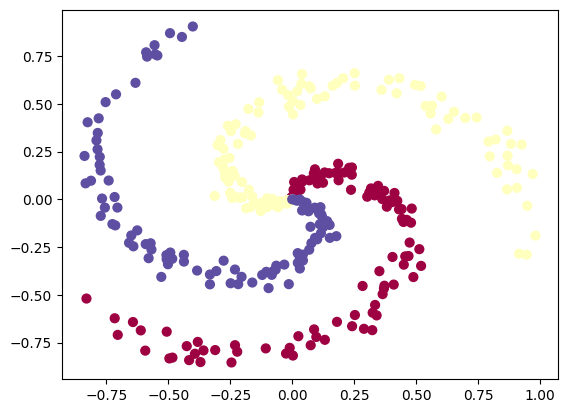

In [1]:
# Generate spiral dataset

import numpy as np
import matplotlib.pyplot as plt

N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

### Task 1: Score Function
Implement a function to calculate the score function of a linear classifier.

In [2]:
import numpy as np

def linear_classifier_score(X, W, b):
    """
    Computes the score function for a linear classifier.
    
    Parameters:
    X : np.ndarray
        Input feature matrix of shape (n_samples, n_features).
    W : np.ndarray
        Weight vector of shape (n_features,).
    b : float
        Bias term (scalar).
        
    Returns:
    scores : np.ndarray
        Score vector of shape (n_samples,).
    """
    # Linear score calculation: XW^T + b
    return np.dot(X, W) + b

# Example usage:

# Input data: 2 samples, 2 features
X = np.array([[0.2, 0.8], [0.5, 0.5]])

# Weight vector: 2 features
W = np.array([0.4, 0.6])

# Bias term
b = 0.1

# Calculate scores
scores = linear_classifier_score(X, W, b)
print("Linear Classifier Scores:\n", scores)

Linear Classifier Scores:
 [0.66 0.6 ]


### Task 2: Loss Functions
Implement the following loss functions:
  1. SVM Classifier (Hinge Loss).
  2. Softmax Classifier (Cross-Entropy Loss).

In [3]:
import numpy as np

def hinge_loss(X, y, W, b, regularization_strength=0.0):
    """
    Computes the hinge loss for an SVM classifier.
    
    Parameters:
    X : np.ndarray
        Input feature matrix of shape (n_samples, n_features).
    y : np.ndarray
        True labels vector of shape (n_samples,), values are +1 or -1.
    W : np.ndarray
        Weight vector of shape (n_features,).
    b : float
        Bias term (scalar).
    regularization_strength : float, optional
        Strength of L2 regularization (default is 0, i.e., no regularization).
        
    Returns:
    float
        The hinge loss.
    """
    # Scores from the linear classifier
    scores = np.dot(X, W) + b
    
    # Compute hinge loss
    hinge_losses = np.maximum(0, 1 - y * scores)
    
    # Regularization term (L2 regularization)
    regularization_loss = regularization_strength * np.sum(W**2)
    
    # Average hinge loss over all samples
    return np.mean(hinge_losses) + regularization_loss

def softmax_loss(X, y, W, b, regularization_strength=0.0):
    """
    Computes the softmax loss (cross-entropy loss) for a softmax classifier.
    
    Parameters:
    X : np.ndarray
        Input feature matrix of shape (n_samples, n_features).
    y : np.ndarray
        True labels vector of shape (n_samples,), values are integers representing class indices.
    W : np.ndarray
        Weight matrix of shape (n_classes, n_features).
    b : np.ndarray
        Bias vector of shape (n_classes,).
    regularization_strength : float, optional
        Strength of L2 regularization (default is 0, i.e., no regularization).
        
    Returns:
    float
        The softmax loss (cross-entropy loss).
    """
    # Scores from the linear classifier (n_samples, n_classes)
    scores = np.dot(X, W.T) + b
    
    # Numeric stability: subtract max score from each score to prevent overflow
    scores -= np.max(scores, axis=1, keepdims=True)
    
    # Compute softmax probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    
    # Cross-entropy loss
    num_samples = X.shape[0]
    correct_class_log_probs = -np.log(probs[np.arange(num_samples), y])
    data_loss = np.mean(correct_class_log_probs)
    
    # Regularization term (L2 regularization)
    regularization_loss = regularization_strength * np.sum(W**2)
    
    return data_loss + regularization_loss

# Example usage:

# Input data: 3 samples, 2 features
X = np.array([[0.2, 0.8], [0.5, 0.5], [0.9, 0.1]])

# SVM example (binary classification)
y_svm = np.array([1, -1, 1])  # Labels are +1 or -1
W_svm = np.array([0.4, 0.6])
b_svm = 0.1

# Compute hinge loss
svm_loss = hinge_loss(X, y_svm, W_svm, b_svm, regularization_strength=0.1)
print("SVM Hinge Loss:", svm_loss)

# Softmax example (multiclass classification)
y_softmax = np.array([0, 1, 2])  # Labels are class indices
W_softmax = np.array([[0.4, 0.6], [0.1, 0.9], [0.7, 0.3]])  # 3 classes, 2 features
b_softmax = np.array([0.1, 0.2, 0.3])  # Bias for each class

# Compute softmax loss
softmax_loss_value = softmax_loss(X, y_softmax, W_softmax, b_softmax, regularization_strength=0.1)
print("Softmax Cross-Entropy Loss:", softmax_loss_value)

SVM Hinge Loss: 0.8586666666666667
Softmax Cross-Entropy Loss: 1.2250516039575707


### Task 3: Regularization
Add L2 regularization to your loss function.

In [4]:
import numpy as np

def hinge_loss(X, y, W, b, regularization_strength=0.0):
    """
    Computes the hinge loss for an SVM classifier with L2 regularization.
    
    Parameters:
    X : np.ndarray
        Input feature matrix of shape (n_samples, n_features).
    y : np.ndarray
        True labels vector of shape (n_samples,), values are +1 or -1.
    W : np.ndarray
        Weight vector of shape (n_features,).
    b : float
        Bias term (scalar).
    regularization_strength : float
        Strength of L2 regularization (default is 0).
        
    Returns:
    float
        The hinge loss with L2 regularization.
    """
    # Scores from the linear classifier
    scores = np.dot(X, W) + b
    
    # Compute hinge loss
    hinge_losses = np.maximum(0, 1 - y * scores)
    
    # Regularization term (L2 regularization)
    regularization_loss = (regularization_strength / 2) * np.sum(W**2)
    
    # Average hinge loss over all samples + L2 regularization
    return np.mean(hinge_losses) + regularization_loss

def softmax_loss(X, y, W, b, regularization_strength=0.0):
    """
    Computes the softmax loss (cross-entropy loss) for a softmax classifier with L2 regularization.
    
    Parameters:
    X : np.ndarray
        Input feature matrix of shape (n_samples, n_features).
    y : np.ndarray
        True labels vector of shape (n_samples,), values are integers representing class indices.
    W : np.ndarray
        Weight matrix of shape (n_classes, n_features).
    b : np.ndarray
        Bias vector of shape (n_classes,).
    regularization_strength : float
        Strength of L2 regularization (default is 0).
        
    Returns:
    float
        The softmax loss (cross-entropy loss) with L2 regularization.
    """
    # Scores from the linear classifier (n_samples, n_classes)
    scores = np.dot(X, W.T) + b
    
    # Numeric stability: subtract max score from each score to prevent overflow
    scores -= np.max(scores, axis=1, keepdims=True)
    
    # Compute softmax probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    
    # Cross-entropy loss
    num_samples = X.shape[0]
    correct_class_log_probs = -np.log(probs[np.arange(num_samples), y])
    data_loss = np.mean(correct_class_log_probs)
    
    # Regularization term (L2 regularization)
    regularization_loss = (regularization_strength / 2) * np.sum(W**2)
    
    return data_loss + regularization_loss

# Example usage:

# Input data: 3 samples, 2 features
X = np.array([[0.2, 0.8], [0.5, 0.5], [0.9, 0.1]])

# SVM example (binary classification)
y_svm = np.array([1, -1, 1])  # Labels are +1 or -1
W_svm = np.array([0.4, 0.6])
b_svm = 0.1

# Compute hinge loss with L2 regularization
svm_loss = hinge_loss(X, y_svm, W_svm, b_svm, regularization_strength=0.1)
print("SVM Hinge Loss with L2 Regularization:", svm_loss)

# Softmax example (multiclass classification)
y_softmax = np.array([0, 1, 2])  # Labels are class indices
W_softmax = np.array([[0.4, 0.6], [0.1, 0.9], [0.7, 0.3]])  # 3 classes, 2 features
b_softmax = np.array([0.1, 0.2, 0.3])  # Bias for each class

# Compute softmax loss with L2 regularization
softmax_loss_value = softmax_loss(X, y_softmax, W_softmax, b_softmax, regularization_strength=0.1)
print("Softmax Cross-Entropy Loss with L2 Regularization:", softmax_loss_value)

SVM Hinge Loss with L2 Regularization: 0.8326666666666667
Softmax Cross-Entropy Loss with L2 Regularization: 1.1290516039575709


### Task 4: Gradient Descent
Implement gradient descent to minimize the loss function.

In [5]:
import numpy as np

def gradient_descent_svm(X, y, W, b, learning_rate=0.01, regularization_strength=0.1, num_iterations=100):
    """
    Gradient descent to minimize SVM hinge loss.
    
    Parameters:
    X : np.ndarray
        Input feature matrix of shape (n_samples, n_features).
    y : np.ndarray
        True labels vector of shape (n_samples,), values are +1 or -1.
    W : np.ndarray
        Initial weight vector of shape (n_features,).
    b : float
        Initial bias term (scalar).
    learning_rate : float
        Learning rate for gradient descent.
    regularization_strength : float
        Strength of L2 regularization.
    num_iterations : int
        Number of iterations for gradient descent.
        
    Returns:
    W : np.ndarray
        Updated weight vector after gradient descent.
    b : float
        Updated bias term after gradient descent.
    """
    num_samples = X.shape[0]
    
    for i in range(num_iterations):
        scores = np.dot(X, W) + b
        margins = 1 - y * scores
        indicator = np.where(margins > 0, 1, 0)
        
        # Compute gradients
        dW = -np.dot(X.T, y * indicator) / num_samples + regularization_strength * W
        db = -np.sum(y * indicator) / num_samples
        
        # Update weights and bias
        W = W - learning_rate * dW
        b = b - learning_rate * db
        
        if i % 10 == 0:
            loss = hinge_loss(X, y, W, b, regularization_strength)
            print(f"Iteration {i}: Loss = {loss}")
    
    return W, b

def gradient_descent_softmax(X, y, W, b, learning_rate=0.01, regularization_strength=0.1, num_iterations=100):
    """
    Gradient descent to minimize softmax cross-entropy loss.
    
    Parameters:
    X : np.ndarray
        Input feature matrix of shape (n_samples, n_features).
    y : np.ndarray
        True labels vector of shape (n_samples,), values are integers representing class indices.
    W : np.ndarray
        Initial weight matrix of shape (n_classes, n_features).
    b : np.ndarray
        Initial bias vector of shape (n_classes,).
    learning_rate : float
        Learning rate for gradient descent.
    regularization_strength : float
        Strength of L2 regularization.
    num_iterations : int
        Number of iterations for gradient descent.
        
    Returns:
    W : np.ndarray
        Updated weight matrix after gradient descent.
    b : np.ndarray
        Updated bias vector after gradient descent.
    """
    num_samples = X.shape[0]
    num_classes = W.shape[0]
    
    for i in range(num_iterations):
        # Scores from the linear classifier (n_samples, n_classes)
        scores = np.dot(X, W.T) + b
        
        # Compute softmax probabilities
        exp_scores = np.exp(scores - np.max(scores, axis=1, keepdims=True))  # Numeric stability
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        
        # One-hot encode true labels
        y_one_hot = np.zeros_like(probs)
        y_one_hot[np.arange(num_samples), y] = 1
        
        # Compute gradients
        dW = np.dot((probs - y_one_hot).T, X) / num_samples + regularization_strength * W
        db = np.sum(probs - y_one_hot, axis=0) / num_samples
        
        # Update weights and bias
        W = W - learning_rate * dW
        b = b - learning_rate * db
        
        if i % 10 == 0:
            loss = softmax_loss(X, y, W, b, regularization_strength)
            print(f"Iteration {i}: Loss = {loss}")
    
    return W, b

# Example usage:

# Input data: 3 samples, 2 features
X = np.array([[0.2, 0.8], [0.5, 0.5], [0.9, 0.1]])

# SVM example (binary classification)
y_svm = np.array([1, -1, 1])  # Labels are +1 or -1
W_svm = np.array([0.4, 0.6])  # Initial weights
b_svm = 0.1  # Initial bias

# Gradient descent for SVM hinge loss
W_svm, b_svm = gradient_descent_svm(X, y_svm, W_svm, b_svm, learning_rate=0.01, regularization_strength=0.1, num_iterations=100)
print("Updated SVM Weights:", W_svm)
print("Updated SVM Bias:", b_svm)

# Softmax example (multiclass classification)
y_softmax = np.array([0, 1, 2])  # Labels are class indices
W_softmax = np.array([[0.4, 0.6], [0.1, 0.9], [0.7, 0.3]])  # Initial weights (3 classes, 2 features)
b_softmax = np.array([0.1, 0.2, 0.3])  # Initial bias

# Gradient descent for softmax cross-entropy loss
W_softmax, b_softmax = gradient_descent_softmax(X, y_softmax, W_softmax, b_softmax, learning_rate=0.01, regularization_strength=0.1, num_iterations=100)
print("Updated Softmax Weights:", W_softmax)
print("Updated Softmax Bias:", b_softmax)

Iteration 0: Loss = 0.8312459326666667
Iteration 10: Loss = 0.8170724308222783
Iteration 20: Loss = 0.8029595984146516
Iteration 30: Loss = 0.7889062335133743
Iteration 40: Loss = 0.7749111579996397
Iteration 50: Loss = 0.7609732170945124
Iteration 60: Loss = 0.7470912788965379
Iteration 70: Loss = 0.7332642339285156
Iteration 80: Loss = 0.7196837517870868
Iteration 90: Loss = 0.7165255038625565
Updated SVM Weights: [0.54308276 0.63281988]
Updated SVM Bias: 0.38666666666666727
Iteration 0: Loss = 1.1284786278537768
Iteration 10: Loss = 1.1228468982775173
Iteration 20: Loss = 1.1173883460645502
Iteration 30: Loss = 1.112096078066838
Iteration 40: Loss = 1.1069636065571062
Iteration 50: Loss = 1.1019848153581888
Iteration 60: Loss = 1.0971539294197912
Iteration 70: Loss = 1.0924654874557962
Iteration 80: Loss = 1.0879143173013373
Iteration 90: Loss = 1.083495513689211
Updated Softmax Weights: [[0.27441813 0.65848257]
 [0.09733377 0.81197434]
 [0.71399867 0.15816896]]
Updated Softmax Bias

### Task 5: LaTeX Write-Up
Document your approach and results using LaTeX. You should include the following sections:
  1. Introduction: Briefly describe the goal of the assignment.
  2. Methodology:
     - Explain the implementation of the score function.
     - Describe the hinge loss and softmax loss.
     - Discuss the regularization used.
     - Explain the gradient descent method you implemented.
  3. Results: Include any plots or results from your Python code.
  4. Conclusion: Summarize your findings and any challenges you faced.
